In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import random
import datetime

**1.  Load and Preprocess the Dataset**

In [26]:
import pandas as pd

# Load the dataset
data = pd.read_csv('../dataset/heart.csv')

# Display the first few rows
print(data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [27]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [28]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

In [29]:
# Scale numeric features
scaler = StandardScaler()
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

data_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,0.952197,1,0.763956,-0.256334,1,0.015443,0,1.087338,0,1,False,False,True,False,False,False,False,True,False,False
1,-1.915313,1,-0.092738,0.072199,0,1.633471,0,2.122573,0,1,False,True,False,True,False,False,False,False,True,False
2,-1.474158,0,-0.092738,-0.816773,0,0.977514,0,0.310912,0,1,True,False,False,False,False,False,True,False,True,False
3,0.180175,1,-0.663867,-0.198357,0,1.239897,0,-0.206705,0,1,True,False,False,True,False,False,True,False,True,False
4,0.290464,0,-0.663867,2.082050,0,0.583939,1,-0.379244,0,1,False,False,False,True,False,False,True,False,True,False


**2. Data Visualization of Long-Term Trends**


***2.1. Correlation Matrix of Features***

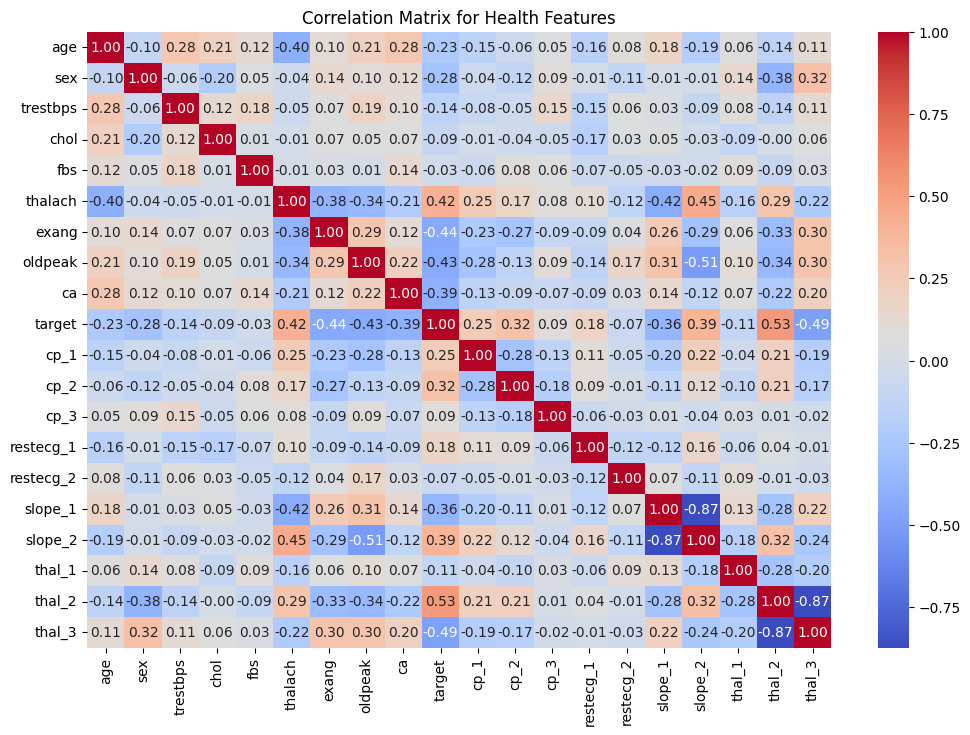

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(data_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix for Health Features")
plt.show()


***2.2. Risk by Age Bucket (Simulating Long-Term Trend)***

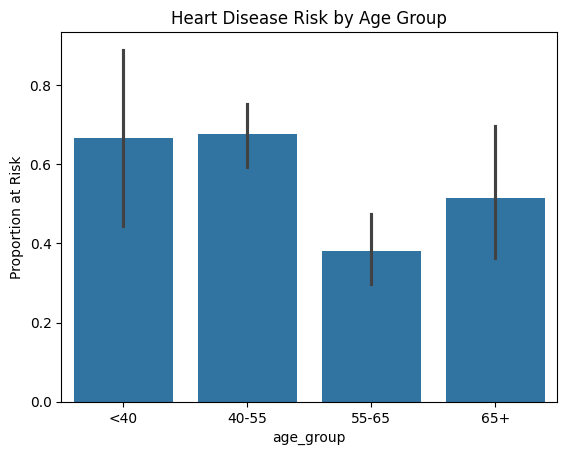

In [31]:
# Create age groups to simulate baseline risk
data['age_group'] = pd.cut(data['age'], bins=[29, 40, 55, 65, 80], labels=['<40', '40-55', '55-65', '65+'])

# Plot heart disease occurrence by age group
sns.barplot(x='age_group', y='target', data=data)
plt.title("Heart Disease Risk by Age Group")
plt.ylabel("Proportion at Risk")
plt.show()


**3. Predictive Model for Long-Term Risk**

In [32]:
X = data_encoded.drop("target", axis=1)
y = data_encoded["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



***3.1. Trend Analysis with Time Windows (Simulated data integrated)***

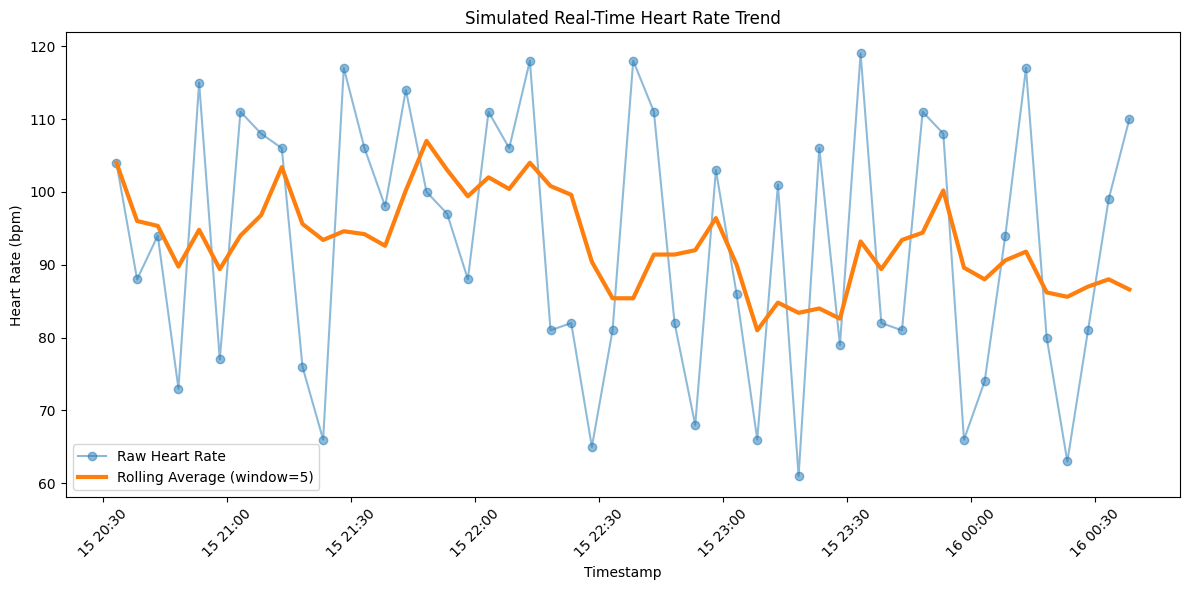

,timestamp,heart_rate,oxygen_saturation,temperature,activity_level,heart_rate_avg
0,2025-04-15 20:33:13.593356,104,92,37.0,walking,104.000000
1,2025-04-15 20:38:13.593356,88,90,36.9,walking,96.000000
2,2025-04-15 20:43:13.593356,94,95,38.2,walking,95.333333
3,2025-04-15 20:48:13.593356,73,90,37.8,resting,89.750000
4,2025-04-15 20:53:13.593356,115,92,36.8,running,94.800000


In [33]:
# Simulate a long-term trend analysis: Aggregate simulated live data over time windows


def generate_extended_live_data(n=50):
    stream = []
    base_time = datetime.datetime.now()
    for i in range(n):
        simulated_time = base_time + datetime.timedelta(minutes=i*5)
        stream.append({
            "timestamp": simulated_time,
            "heart_rate": random.randint(60, 120),
            "oxygen_saturation": random.randint(90, 100),
            "temperature": round(random.uniform(36.0, 38.5), 1),
            "activity_level": random.choice(["resting", "walking", "running"])
        })
    return stream

extended_live_stream = generate_extended_live_data(50)
extended_live_df = pd.DataFrame(extended_live_stream)

# Create a rolling window average for heart rate to simulate trend analysis
extended_live_df['heart_rate_avg'] = extended_live_df['heart_rate'].rolling(window=5, min_periods=1).mean()

# Plot the trend of heart rate over time
plt.figure(figsize=(12,6))
plt.plot(extended_live_df['timestamp'], extended_live_df['heart_rate'], label="Raw Heart Rate", alpha=0.5, marker='o')
plt.plot(extended_live_df['timestamp'], extended_live_df['heart_rate_avg'], label="Rolling Average (window=5)", linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Heart Rate (bpm)")
plt.title("Simulated Real-Time Heart Rate Trend")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Display first few rows of the extended live data for inspection
extended_live_df.head()


***3.2. Compute Baseline Health Indices for an Individual User***

In [34]:
# Compute baseline indices for an individual user using the extended live data simulation.


# Select the key vital parameters to compute the baseline indices
vital_columns = ['heart_rate', 'oxygen_saturation', 'temperature']

# Compute baseline statistics: mean, standard deviation, min, and max for these vitals.
baseline_indices = extended_live_df[vital_columns].agg(['mean', 'std', 'min', 'max']).T
baseline_indices.columns = ['Mean', 'Std Dev', 'Minimum', 'Maximum']

print("Baseline Health Indices for the User (Simulated):")
baseline_indices


Baseline Health Indices for the User (Simulated):


,Mean,Std Dev,Minimum,Maximum
heart_rate,92.960,17.702715,61.0,119.0
oxygen_saturation,94.940,3.197001,90.0,100.0
temperature,37.318,0.711621,36.0,38.3


**4. Simulate Live Data Collected by Apple Watch**


***4.1. Real-Time Vitals Generator***

In [35]:
# Simulate real-time sensor data for a single user
def simulate_live_data():
    return {
        "timestamp": datetime.datetime.now(),
        "heart_rate": random.randint(60, 120),
        "oxygen_saturation": random.randint(90, 100),
        "temperature": round(random.uniform(36.0, 38.5), 1),
        "activity_level": random.choice(["resting", "walking", "running"])
    }

# Simulate stream of 10 data points
live_stream = [simulate_live_data() for _ in range(10)]
live_df = pd.DataFrame(live_stream)
live_df


,timestamp,heart_rate,oxygen_saturation,temperature,activity_level
0,2025-04-15 20:33:14.163187,112,100,37.7,resting
1,2025-04-15 20:33:14.163211,90,96,36.1,running
2,2025-04-15 20:33:14.163220,109,97,38.2,running
3,2025-04-15 20:33:14.163225,105,95,37.7,walking
4,2025-04-15 20:33:14.163229,95,90,36.7,walking
5,2025-04-15 20:33:14.163233,92,96,37.7,resting
6,2025-04-15 20:33:14.163237,108,100,36.9,running
7,2025-04-15 20:33:14.163241,80,94,37.4,resting
8,2025-04-15 20:33:14.163245,73,98,38.4,running
9,2025-04-15 20:33:14.163248,110,100,36.5,walking


***4.2. Anomaly Detection Logic***

In [36]:
def detect_anomalies(row):
    alerts = []
    if row["heart_rate"] > 110:
        alerts.append("High Heart Rate")
    if row["oxygen_saturation"] < 93:
        alerts.append("Low O2 Level")
    if row["temperature"] > 37.8:
        alerts.append("High Body Temp")
    return alerts

live_df["alerts"] = live_df.apply(detect_anomalies, axis=1)
live_df


,timestamp,heart_rate,oxygen_saturation,temperature,activity_level,alerts
0,2025-04-15 20:33:14.163187,112,100,37.7,resting,[High Heart Rate]
1,2025-04-15 20:33:14.163211,90,96,36.1,running,[]
2,2025-04-15 20:33:14.163220,109,97,38.2,running,[High Body Temp]
3,2025-04-15 20:33:14.163225,105,95,37.7,walking,[]
4,2025-04-15 20:33:14.163229,95,90,36.7,walking,[Low O2 Level]
5,2025-04-15 20:33:14.163233,92,96,37.7,resting,[]
6,2025-04-15 20:33:14.163237,108,100,36.9,running,[]
7,2025-04-15 20:33:14.163241,80,94,37.4,resting,[]
8,2025-04-15 20:33:14.163245,73,98,38.4,running,[High Body Temp]
9,2025-04-15 20:33:14.163248,110,100,36.5,walking,[]


***4.3.Real-Time Anomaly Detection Using Baseline Indices***

In [37]:
# Define a function that compares a new vital reading with the established baseline.
# We trigger an alert if the new reading is beyond a threshold (e.g., 1 standard deviation from the mean).

def detect_anomalies_with_baseline(new_reading, baseline, vital='heart_rate'):
    """
    Compare new vital reading with baseline indices.
    Args:
        new_reading (float): The current reading of the vital.
        baseline (pd.Series): The baseline statistics for the vital.
        vital (str): Name of the vital sign to check.
    Returns:
        list: List of alerts if deviations are found.
    """
    alerts = []
    mean_val = baseline['Mean']
    std_val  = baseline['Std Dev']
    
    # Define thresholds: we use 1 std dev for demo; thresholds can be customized.
    lower_threshold = mean_val - std_val
    upper_threshold = mean_val + std_val
    
    if new_reading < lower_threshold:
        alerts.append(f"{vital} too low: {new_reading:.1f} < {lower_threshold:.1f}")
    elif new_reading > upper_threshold:
        alerts.append(f"{vital} too high: {new_reading:.1f} > {upper_threshold:.1f}")
    return alerts

# Demonstrate anomaly detection using a new simulated reading.
new_live_reading = simulate_live_data()  # Get a new reading from our earlier simulation

print("New Live Reading:")
print(new_live_reading)

# Check each vital sign against its baseline index
live_alerts = {}
for vital in vital_columns:
    # Retrieve the current reading for the vital sign
    current_value = new_live_reading[vital]
    
    # Compute alerts based on baseline deviation
    live_alerts[vital] = detect_anomalies_with_baseline(current_value, baseline_indices.loc[vital], vital=vital)

print("\nGenerated Alerts based on Baseline Comparison:")
for vital, alerts in live_alerts.items():
    print(f"{vital}: {alerts if alerts else 'Within baseline limits'}")


New Live Reading:
{'timestamp': datetime.datetime(2025, 4, 15, 20, 33, 14, 266526), 'heart_rate': 101, 'oxygen_saturation': 94, 'temperature': 37.6, 'activity_level': 'running'}

Generated Alerts based on Baseline Comparison:
heart_rate: Within baseline limits
oxygen_saturation: Within baseline limits
temperature: Within baseline limits


**5. Output (Simulated)**

In [38]:
# Real-Time Alert Dashboard (Simulated)
for index, row in live_df.iterrows():
    print(f"[{row['timestamp'].strftime('%H:%M:%S')}] - Alerts: {', '.join(row['alerts']) if row['alerts'] else 'Vitals Normal'}")


[20:33:14] - Alerts: High Heart Rate
[20:33:14] - Alerts: Vitals Normal
[20:33:14] - Alerts: High Body Temp
[20:33:14] - Alerts: Vitals Normal
[20:33:14] - Alerts: Low O2 Level
[20:33:14] - Alerts: Vitals Normal
[20:33:14] - Alerts: Vitals Normal
[20:33:14] - Alerts: Vitals Normal
[20:33:14] - Alerts: High Body Temp
[20:33:14] - Alerts: Vitals Normal


In [39]:
# Linking with Long-Term Model
# Random example input from test set
sample_user = X_test.iloc[0:1]
prediction = model.predict(sample_user)
risk = "High Risk" if prediction[0] == 1 else "Low Risk"

print("Long-Term Prediction for this User:", risk)


Long-Term Prediction for this User: Low Risk
